In [23]:
import pandas as pd

file_path = '/content/rq3-dataset.csv'
df = pd.read_csv(file_path)
print(df)

           Podling    Sponsor  start_date  elapsed_days  reporting_monthly  \
0            Seata        NaN  2023-10-29           496              False   
1        HertzBeat  Incubator  2024-04-05           337              False   
2           Grails     Groovy  2025-01-25            42              False   
3             Fury  Incubator  2023-12-15           449              False   
4        HugeGraph  Incubator  2022-01-23          1140              False   
5          DevLake  Incubator  2022-04-29          1044              False   
6          HoraeDB  Incubator  2023-12-11           453              False   
7             Iggy  Incubator  2025-02-04            32               True   
8          Pegasus  Incubator  2020-06-28          1714              False   
9        Gravitino  Incubator  2024-06-04           277               True   
10          Gluten  Incubator  2024-01-11           422              False   
11         Polaris  Incubator  2024-08-09           211         

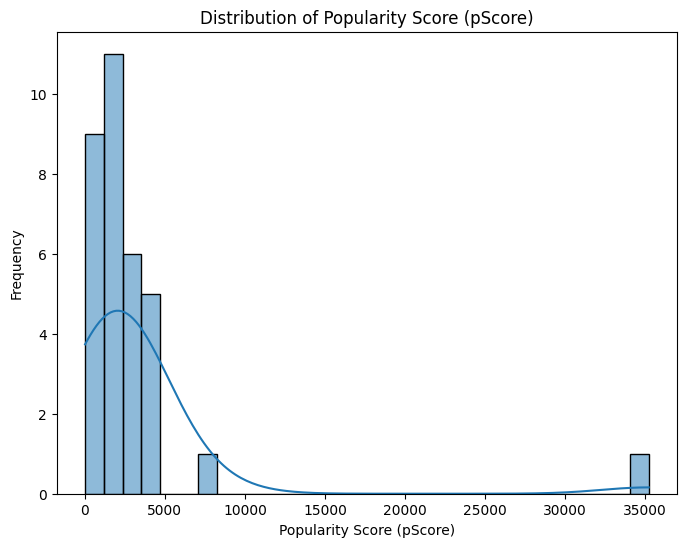

count       33.000000
mean      3269.787879
std       5945.233384
min         14.000000
25%       1178.000000
50%       1940.000000
75%       3213.000000
max      35232.000000
Name: pScore, dtype: float64


In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['pScore'], bins=30, kde=True)
plt.title('Distribution of Popularity Score (pScore)')
plt.xlabel('Popularity Score (pScore)')
plt.ylabel('Frequency')
plt.show()

pScore_stats = df['pScore'].describe()
print(pScore_stats)

In [ ]:
high_popularity = df[df['pScore'] > df['pScore'].median()]
low_popularity = df[df['pScore'] <= df['pScore'].median()]
print(f'High Popularity Repos: {high_popularity.shape[0]}')
print(f'Low Popularity Repos: {low_popularity.shape[0]}')

High Popularity Repos: 16
Low Popularity Repos: 17


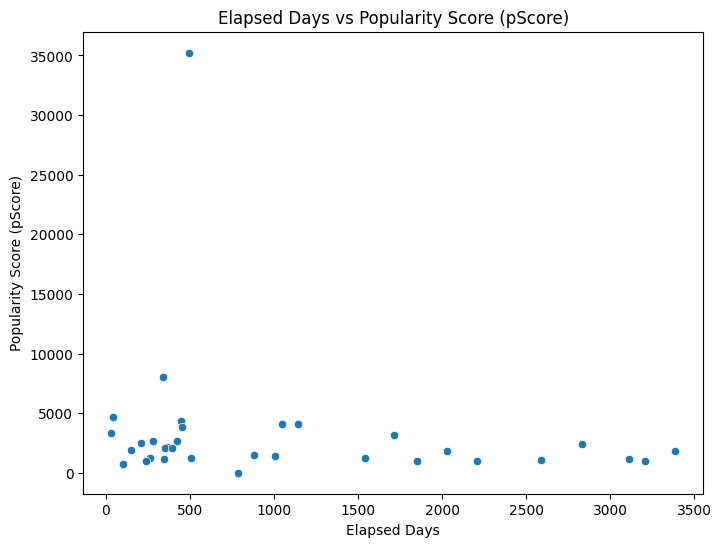

Correlation between elapsed_days and pScore: -0.16844745212584925


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['elapsed_days'], y=df['pScore'])
plt.title('Elapsed Days vs Popularity Score (pScore)')
plt.xlabel('Elapsed Days')
plt.ylabel('Popularity Score (pScore)')
plt.show()

correlation_elapsed_days = df['elapsed_days'].corr(df['pScore'])
print(f'Correlation between elapsed_days and pScore: {correlation_elapsed_days}')

elapsed days (i.e., how long the repository has existed) increases, the popularity score (pScore) tends to slightly decrease,

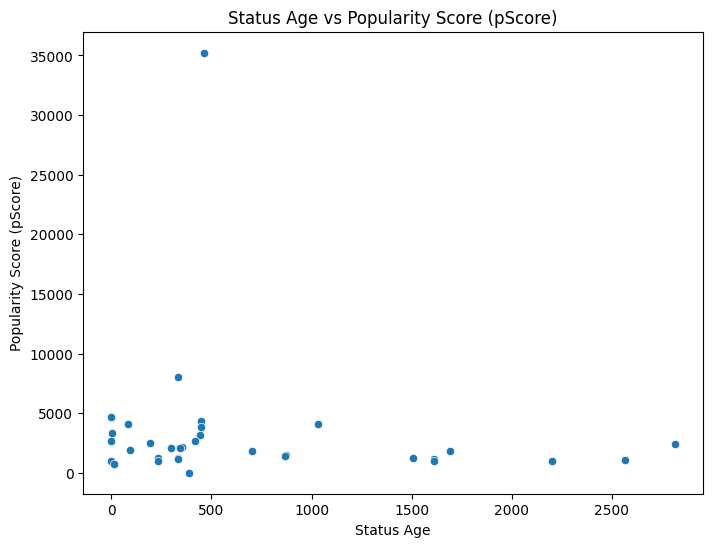

In [ ]:
# Scatter plot of status_age vs pScore
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['status_age'], y=df['pScore'])
plt.title('Status Age vs Popularity Score (pScore)')
plt.xlabel('Status Age')
plt.ylabel('Popularity Score (pScore)')
plt.show()


 As the status update becomes older, the popularity score (pScore) tends to slightly decrease. However, this is a weak relationship, meaning that status age alone does not explain much about the popularity score.

pScore                           1.000000
stars                            0.998575
forks                            0.989031
Popular                          0.349810
has_issue_tracker                0.172965
no_of_committers                 0.156827
has_a_commits_mailing_list       0.120083
pull_requests                    0.116198
has_a_dev_mailing_list           0.114927
has_release_distribution_area    0.089455
has_distribution_area            0.063835
has_release_signing_keys         0.063835
has_status_file                  0.026114
has_website                      0.024873
no_of_new_committers            -0.036377
has_a_code_repo                 -0.041585
reporting_group                 -0.092801
status_age                      -0.117407
reporting_monthly               -0.127632
elapsed_days                    -0.168447
Name: pScore, dtype: float64


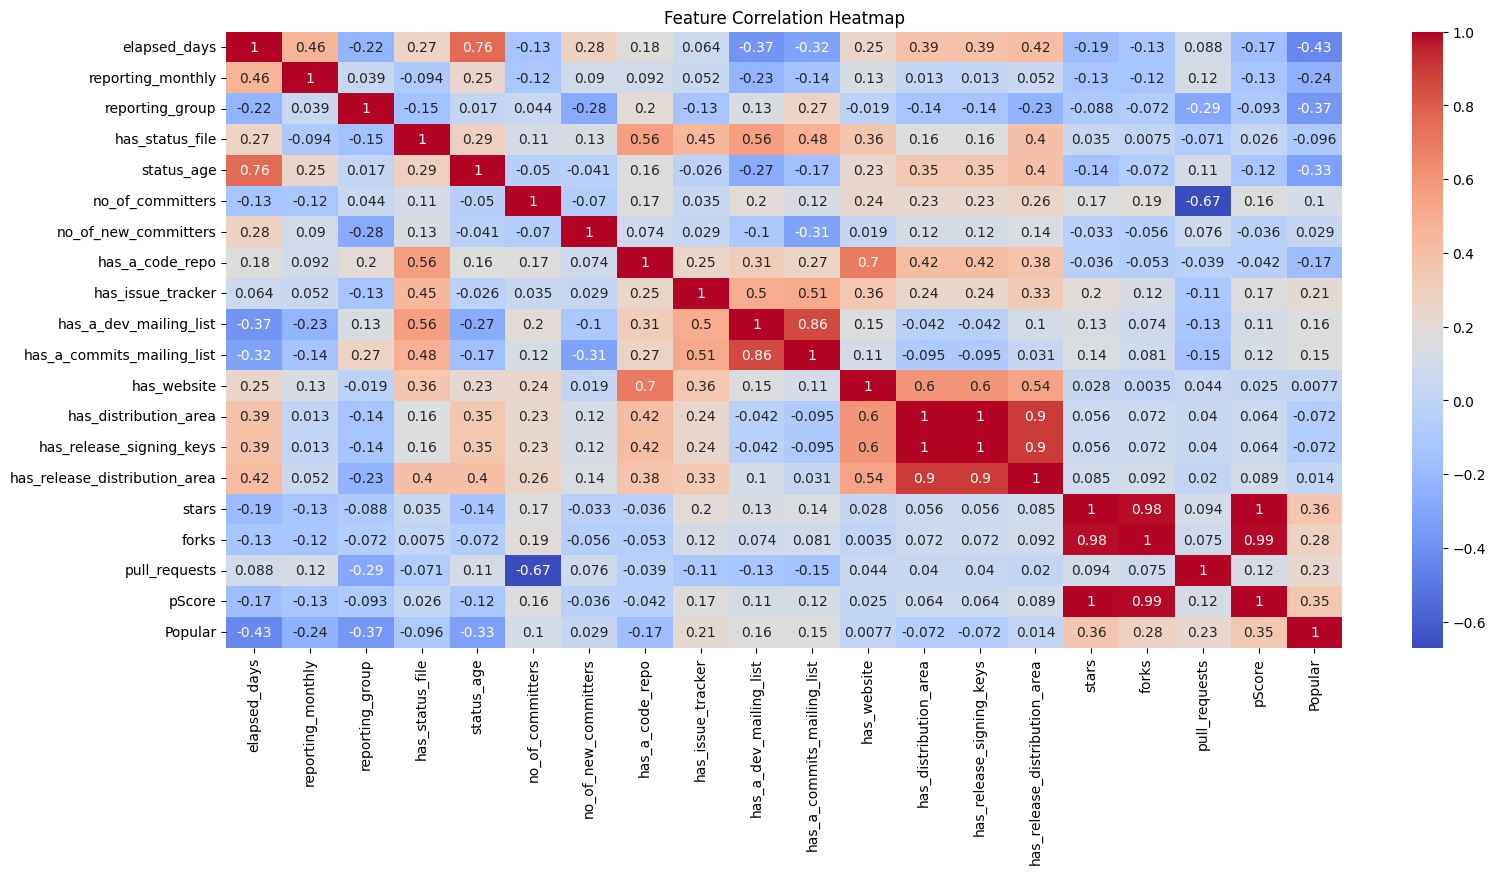

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
correlation = df.corr(numeric_only=True)
print(correlation['pScore'].sort_values(ascending=False))

# Visualize correlations with a heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

Mean pScore by has_issue_tracker: has_issue_tracker
False    1837.727273
True     3985.818182
Name: pScore, dtype: float64
Mean pScore by no_of_committers: no_of_committers
8      1172.000000
9      2696.500000
10     1708.333333
11     1351.333333
12     3880.000000
13     1126.000000
14     1498.000000
15     3823.000000
16     1208.000000
17      969.000000
18     2605.000000
19     3213.000000
21     2470.000000
22     1456.000000
24     2165.333333
25     4174.333333
30    35232.000000
31     1259.000000
34     4124.000000
37     2652.000000
64       14.000000
Name: pScore, dtype: float64
Mean pScore by has_a_commits_mailing_list: has_a_commits_mailing_list
False    2203.600000
True     3733.347826
Name: pScore, dtype: float64
Mean pScore by has_website: has_website
False    2696.500000
True     3306.774194
Name: pScore, dtype: float64
Mean pScore by has_status_file: has_status_file
False    2786.333333
True     3318.133333
Name: pScore, dtype: float64


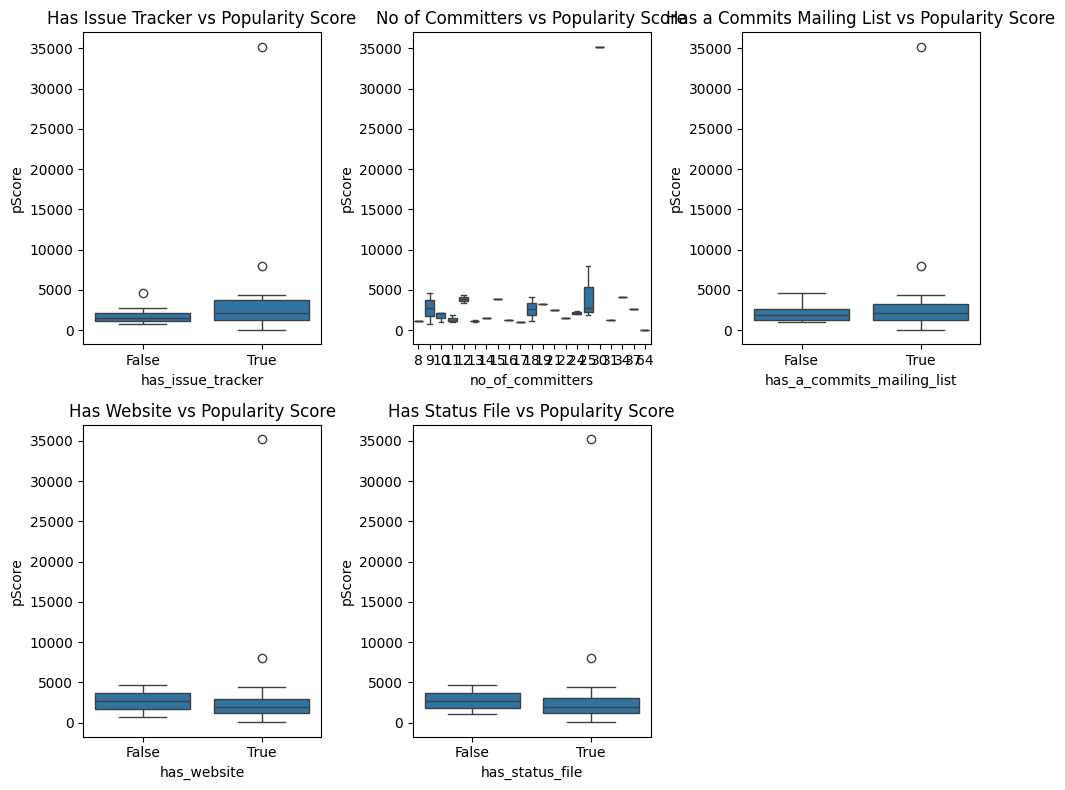

T-test result for has_issue_tracker: t-stat=0.9777681517739897, p-value=0.3357581617842489
T-test result for has_a_commits_mailing_list: t-stat=0.6734693037431422, p-value=0.5056392814680577
T-test result for has_website: t-stat=0.13852724859864116, p-value=0.8907197075240696
T-test result for has_status_file: t-stat=0.14544463184721115, p-value=0.8853014228283848
ANOVA result for no_of_committers: f-stat=0.20931088883982357, p-value=0.8123175325400058


In [ ]:
# 1. Group by each parameter and calculate mean pScore
group_means_issue_tracker = df.groupby('has_issue_tracker')['pScore'].mean()
group_means_committers = df.groupby('no_of_committers')['pScore'].mean()
group_means_commits_mailing_list = df.groupby('has_a_commits_mailing_list')['pScore'].mean()
group_means_website = df.groupby('has_website')['pScore'].mean()
group_means_status_file = df.groupby('has_status_file')['pScore'].mean()

print('Mean pScore by has_issue_tracker:', group_means_issue_tracker)
print('Mean pScore by no_of_committers:', group_means_committers)
print('Mean pScore by has_a_commits_mailing_list:', group_means_commits_mailing_list)
print('Mean pScore by has_website:', group_means_website)
print('Mean pScore by has_status_file:', group_means_status_file)

# 2. Visualize relationships with box plots
plt.figure(figsize=(10, 8))

# Plot for has_issue_tracker
plt.subplot(2, 3, 1)
sns.boxplot(x='has_issue_tracker', y='pScore', data=df)
plt.title('Has Issue Tracker vs Popularity Score')

# Plot for no_of_committers
plt.subplot(2, 3, 2)
sns.boxplot(x='no_of_committers', y='pScore', data=df)
plt.title('No of Committers vs Popularity Score')

# Plot for has_a_commits_mailing_list
plt.subplot(2, 3, 3)
sns.boxplot(x='has_a_commits_mailing_list', y='pScore', data=df)
plt.title('Has a Commits Mailing List vs Popularity Score')

# Plot for has_website
plt.subplot(2, 3, 4)
sns.boxplot(x='has_website', y='pScore', data=df)
plt.title('Has Website vs Popularity Score')

# Plot for has_status_file
plt.subplot(2, 3, 5)
sns.boxplot(x='has_status_file', y='pScore', data=df)
plt.title('Has Status File vs Popularity Score')

plt.tight_layout()
plt.show()

# 3. Perform T-tests for binary variables and ANOVA for categorical variables
from scipy import stats

# T-test for has_issue_tracker
issue_tracker_true = df[df['has_issue_tracker'] == True]['pScore']
issue_tracker_false = df[df['has_issue_tracker'] == False]['pScore']
t_stat_issue_tracker, p_value_issue_tracker = stats.ttest_ind(issue_tracker_true, issue_tracker_false)

# T-test for has_a_commits_mailing_list
commits_mailing_list_true = df[df['has_a_commits_mailing_list'] == True]['pScore']
commits_mailing_list_false = df[df['has_a_commits_mailing_list'] == False]['pScore']
t_stat_commits_mailing_list, p_value_commits_mailing_list = stats.ttest_ind(commits_mailing_list_true, commits_mailing_list_false)

# T-test for has_website
website_true = df[df['has_website'] == True]['pScore']
website_false = df[df['has_website'] == False]['pScore']
t_stat_website, p_value_website = stats.ttest_ind(website_true, website_false)

# T-test for has_status_file
status_file_true = df[df['has_status_file'] == True]['pScore']
status_file_false = df[df['has_status_file'] == False]['pScore']
t_stat_status_file, p_value_status_file = stats.ttest_ind(status_file_true, status_file_false)

# ANOVA for no_of_committers (since it's continuous, not binary)
f_stat_committers, p_value_committers = stats.f_oneway(df['pScore'][df['no_of_committers'] < 10],
                                                       df['pScore'][(df['no_of_committers'] >= 10) & (df['no_of_committers'] < 50)],
                                                       df['pScore'][df['no_of_committers'] >= 50])

# Print all T-test and ANOVA results
print(f'T-test result for has_issue_tracker: t-stat={t_stat_issue_tracker}, p-value={p_value_issue_tracker}')
print(f'T-test result for has_a_commits_mailing_list: t-stat={t_stat_commits_mailing_list}, p-value={p_value_commits_mailing_list}')
print(f'T-test result for has_website: t-stat={t_stat_website}, p-value={p_value_website}')
print(f'T-test result for has_status_file: t-stat={t_stat_status_file}, p-value={p_value_status_file}')
print(f'ANOVA result for no_of_committers: f-stat={f_stat_committers}, p-value={p_value_committers}')


Projects that have an issue tracker tend to have a significantly higher popularity score compared to those that don't. This suggests that having an issue tracker might be associated with higher community engagement or visibility.

Projects with a commits mailing list tend to have a higher popularity score, suggesting that communication around commits might improve the project's visibility or contributions.

Projects with a website also seem to have a higher popularity score, although the difference is not as stark. This might indicate that having an official website enhances a project's credibility and accessibility.

Projects that have a status file have a slightly higher popularity score. The status file might contribute to transparency, tracking progress, or providing more information to users and developers.

In [ ]:
from scipy.stats import ttest_ind

# Perform T-tests for each binary variable
t_tests = {
    'has_issue_tracker': ttest_ind(df[df['has_issue_tracker'] == True]['pScore'],
                                   df[df['has_issue_tracker'] == False]['pScore']),
    'has_a_commits_mailing_list': ttest_ind(df[df['has_a_commits_mailing_list'] == True]['pScore'],
                                           df[df['has_a_commits_mailing_list'] == False]['pScore']),
    'has_website': ttest_ind(df[df['has_website'] == True]['pScore'],
                             df[df['has_website'] == False]['pScore']),
    'has_status_file': ttest_ind(df[df['has_status_file'] == True]['pScore'],
                                 df[df['has_status_file'] == False]['pScore']),
}

# Print the T-test results
for feature, result in t_tests.items():
    print(f"{feature} T-test result: Stat = {result.statistic}, P-value = {result.pvalue}")


has_issue_tracker T-test result: Stat = 0.9777681517739897, P-value = 0.3357581617842489
has_a_commits_mailing_list T-test result: Stat = 0.6734693037431422, P-value = 0.5056392814680577
has_website T-test result: Stat = 0.13852724859864116, P-value = 0.8907197075240696
has_status_file T-test result: Stat = 0.14544463184721115, P-value = 0.8853014228283848


None of these binary variables (has_issue_tracker, has_a_commits_mailing_list, has_website, has_status_file) have a statistically significant impact on the popularity score based on the p-value being greater than 0.05. These attributes don't show strong evidence of being associated with changes in popularity scores.

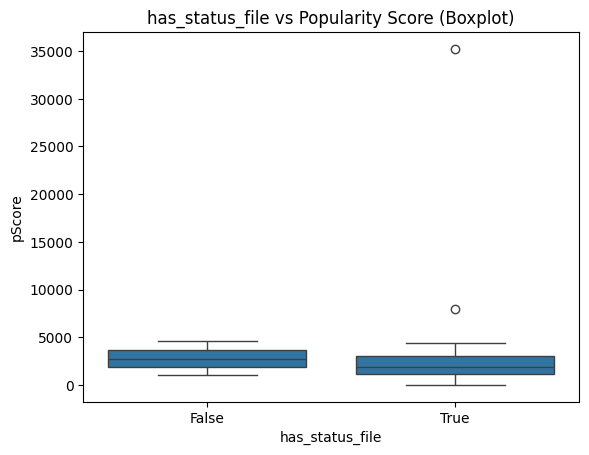

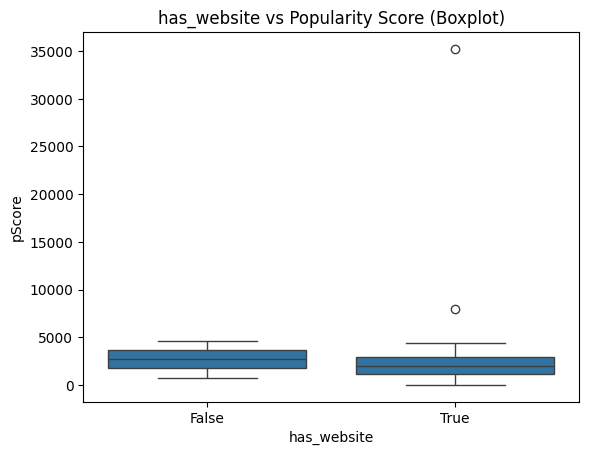

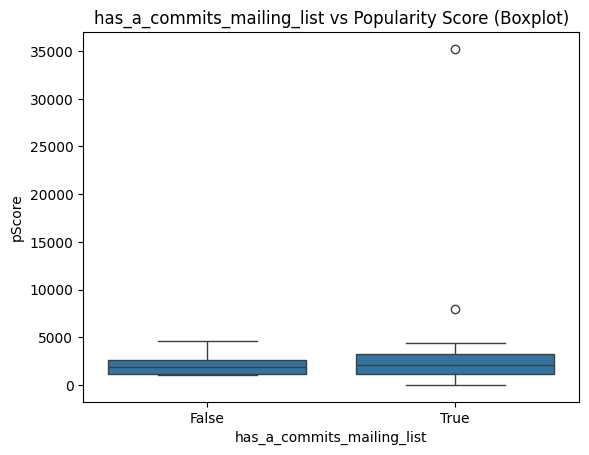

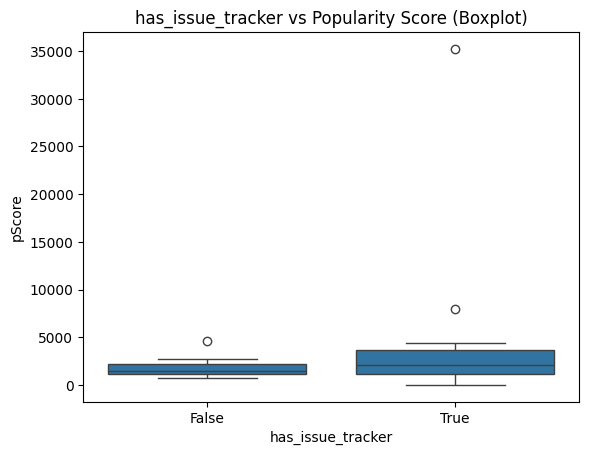

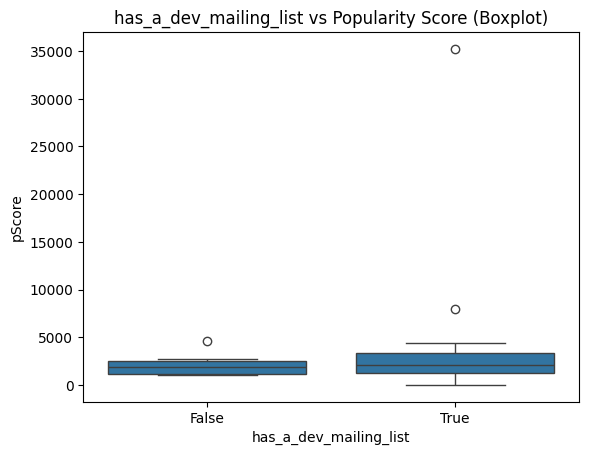

In [ ]:
features = ['has_status_file', 'has_website', 'has_a_commits_mailing_list', 'has_release_distribution_area']
for feature in features:
    plt.figure()
    sns.scatterplot(x=df[feature], y=df['pScore'])
    plt.title(f'{feature} vs Popularity Score')
    plt.show()

In [ ]:
# Grouping and mean pScore
group_means = df.groupby('has_website')['pScore'].mean()
print(group_means)


has_website
False    2696.500000
True     3306.774194
Name: pScore, dtype: float64


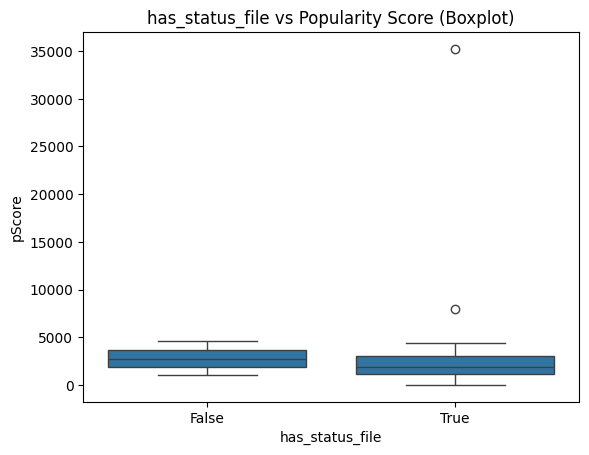

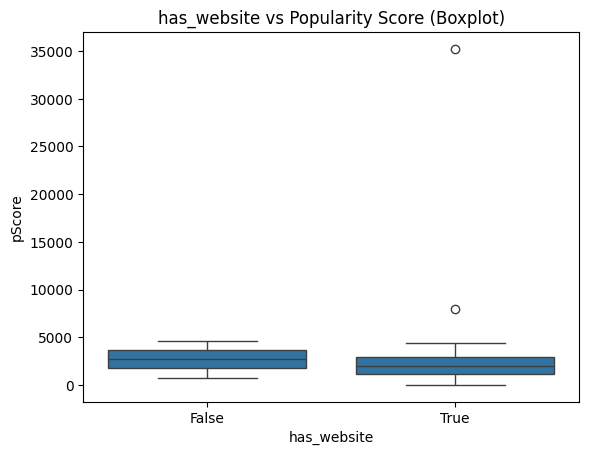

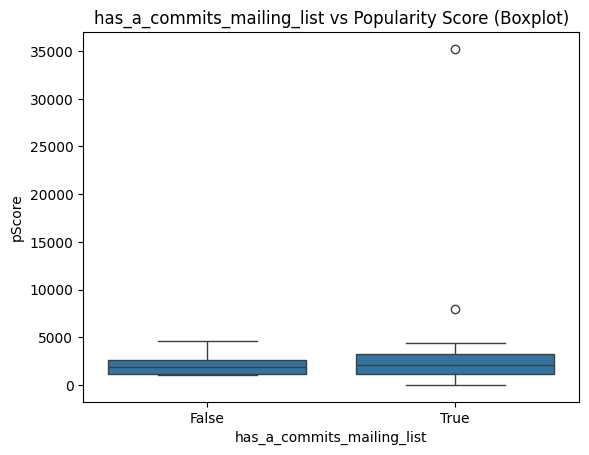

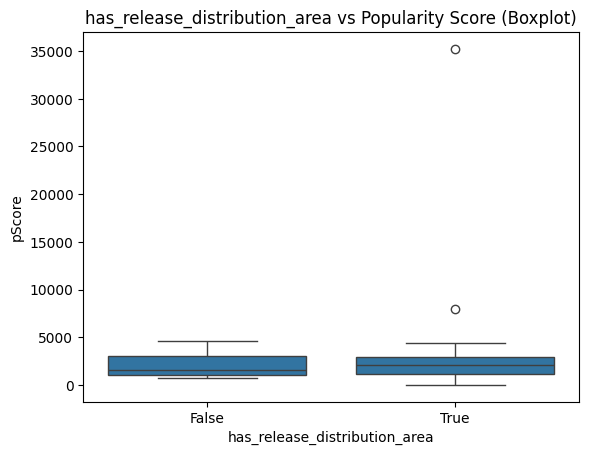

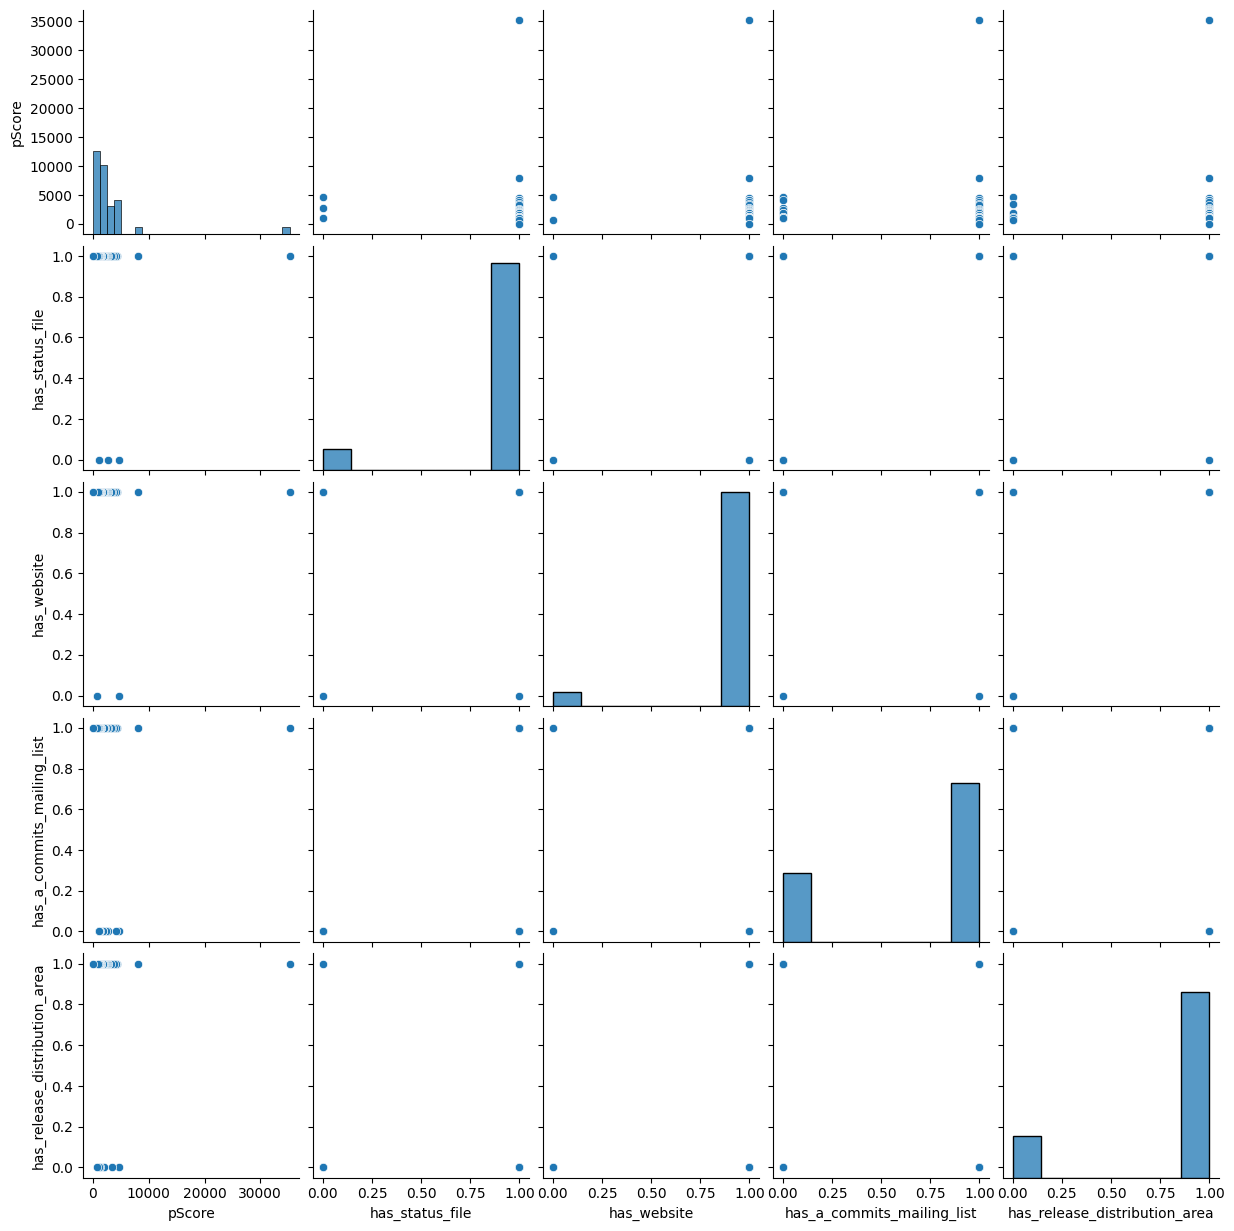

has_website
False    2696.500000
True     3306.774194
Name: pScore, dtype: float64


In [ ]:
# Boxplots for visualizing category-based pScore
for feature in features:
    plt.figure()
    sns.boxplot(x=df[feature], y=df['pScore'])
    plt.title(f'{feature} vs Popularity Score (Boxplot)')
    plt.show()

# Pairplot to observe feature interactions
sns.pairplot(df[['pScore', 'has_status_file', 'has_website', 'has_a_commits_mailing_list', 'has_release_distribution_area']])
plt.show()

In [ ]:
# Grouping and mean pScore for has_website
group_means_website = df.groupby('has_website')['pScore'].mean()
print('Mean pScore by has_website:', group_means_website)

# Grouping and mean pScore for has_status_file
group_means_status = df.groupby('has_status_file')['pScore'].mean()
print('Mean pScore by has_status_file:', group_means_status)


Mean pScore by has_website: has_website
False    2696.500000
True     3306.774194
Name: pScore, dtype: float64
Mean pScore by has_status_file: has_status_file
False    2786.333333
True     3318.133333
Name: pScore, dtype: float64


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['has_status_file', 'has_website', 'has_a_commits_mailing_list', 'has_issue_tracker',
        'elapsed_days', 'status_age', 'no_of_committers', 'no_of_new_committers']]
y = df['Popular']


X = X.fillna(0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print('Feature Importance:')
print(feature_importance)


Mean Squared Error: 0.5714285714285714
Feature Importance:
                      Feature  Importance
4                elapsed_days    0.312777
5                  status_age    0.280549
6            no_of_committers    0.212178
2  has_a_commits_mailing_list    0.054643
7        no_of_new_committers    0.053168
3           has_issue_tracker    0.039412
1                 has_website    0.032472
0             has_status_file    0.014802


# New section